In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# For replicable results
# Refer to the external resource found at here
# https://stackoverflow.com/questions/52375356/is-there-a-way-to-set-random-state-for-all-pandas-function
np.random.seed(42)

In [ ]:
# Import local excel file after initial manual cleaning
# Refer to external resource found at here: https://neptune.ai/blog/google-colab-dealing-with-files
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv('participant-painting-logistic.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Painting_Identification,ParticipantID,Painting_No.,Identification_Correctness,Colours_Like,Brushstrokes_Like,Structures_Like,Details_Like,Condition_Control,Condition_Treatment1,Condition_Treatment2,Monthly_Art_Events,Monthly_Hours_Digital_Arts,Artistic_Specialty_Self_Rating,Painting_GroundTruth_AI,Painting_GroundTruth_Human
0,0,0.0,1.0,1.0,0.40,0.2,0.4,0.6,0.0,0.0,1.0,0.25,0.0,0.125,0,1
1,1,1.0,1.0,0.0,0.20,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.0,0.250,0,1
2,0,2.0,1.0,1.0,0.60,0.8,0.8,0.8,0.0,0.0,1.0,0.00,0.0,0.375,0,1
3,0,3.0,1.0,1.0,0.60,0.8,0.6,0.8,1.0,0.0,0.0,0.25,0.2,0.500,0,1
4,1,4.0,1.0,0.0,0.00,0.0,0.0,0.4,0.0,1.0,0.0,0.00,0.0,0.375,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,145.0,10.0,0.0,0.75,0.6,0.8,0.6,0.0,1.0,0.0,0.00,0.0,0.000,1,0
1496,1,146.0,10.0,1.0,1.00,0.8,0.6,0.4,1.0,0.0,0.0,0.00,0.0,0.375,1,0
1497,1,147.0,10.0,1.0,0.50,0.4,0.2,0.2,0.0,1.0,0.0,0.25,0.0,0.375,1,0
1498,0,148.0,10.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.4,0.375,1,0


In [ ]:
df.columns

Index(['Painting_Identification', 'ParticipantID', 'Painting_No.',
       'Identification_Correctness', 'Colours_Like', 'Brushstrokes_Like',
       'Structures_Like', 'Details_Like', 'Condition_Control',
       'Condition_Treatment1', 'Condition_Treatment2', 'Monthly_Art_Events',
       'Monthly_Hours_Digital_Arts', 'Artistic_Specialty_Self_Rating',
       'Painting_GroundTruth_AI', 'Painting_GroundTruth_Human'],
      dtype='object')

In [ ]:
for i in range (1500):
  if df['Identification_Correctness'].iloc[i] == 1:
    df['Identification_Correctness'].loc[i] = 'True'
  else:
    df['Identification_Correctness'].loc[i] = 'False'

<ipython-input-12-46ba45159c72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Identification_Correctness'].loc[i] = 'True'


In [ ]:
df['Identification_Correctness'].value_counts()

False    785
True     715
Name: Identification_Correctness, dtype: int64

In [ ]:
X = df[['Condition_Control', 'Condition_Treatment1', 'Condition_Treatment2',
                        'Artistic_Specialty_Self_Rating', 'Colours_Like', 'Brushstrokes_Like',
        'Structures_Like', 'Details_Like', 'Painting_GroundTruth_AI', 'Painting_GroundTruth_Human']]
Y = df[['Identification_Correctness']]

In [ ]:
# Run decision tree analysis
# Refer to the external resources found at here:
# https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 2)
model.fit(X, Y)
predicted = model.predict(X)

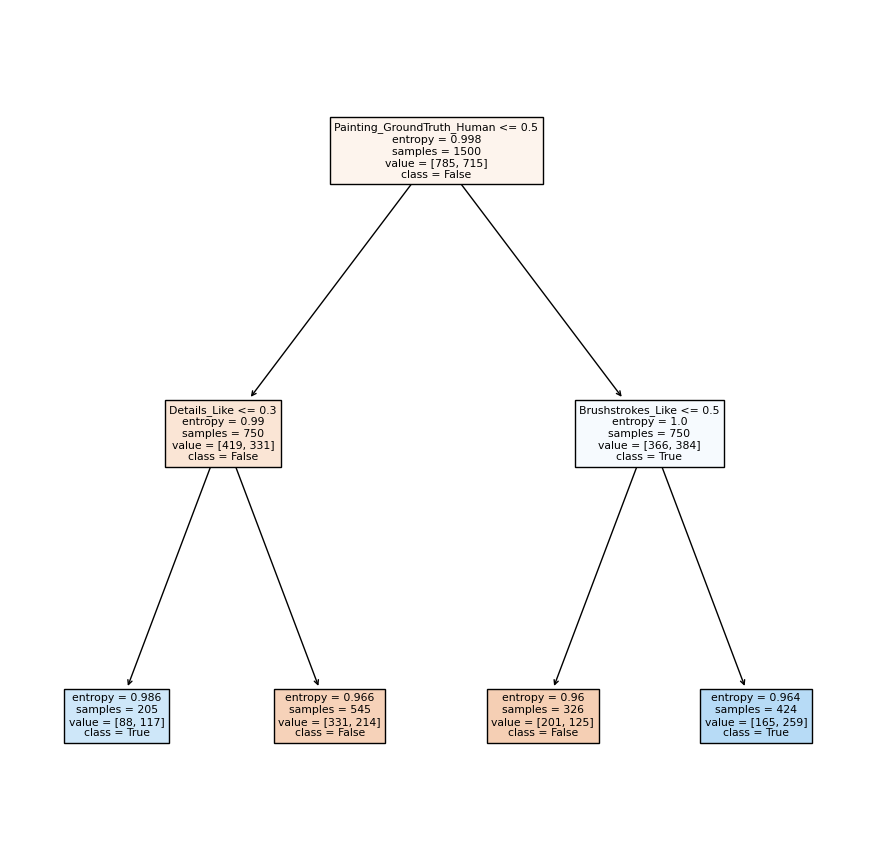

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (11, 11))
tree.plot_tree(model, feature_names = model.feature_names_in_, class_names = model.classes_, filled = True)
plt.show()

In [ ]:
# Run decision tree analysis
# Refer to the external resources found at here:
# https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
model.fit(X, Y)
predicted = model.predict(X)

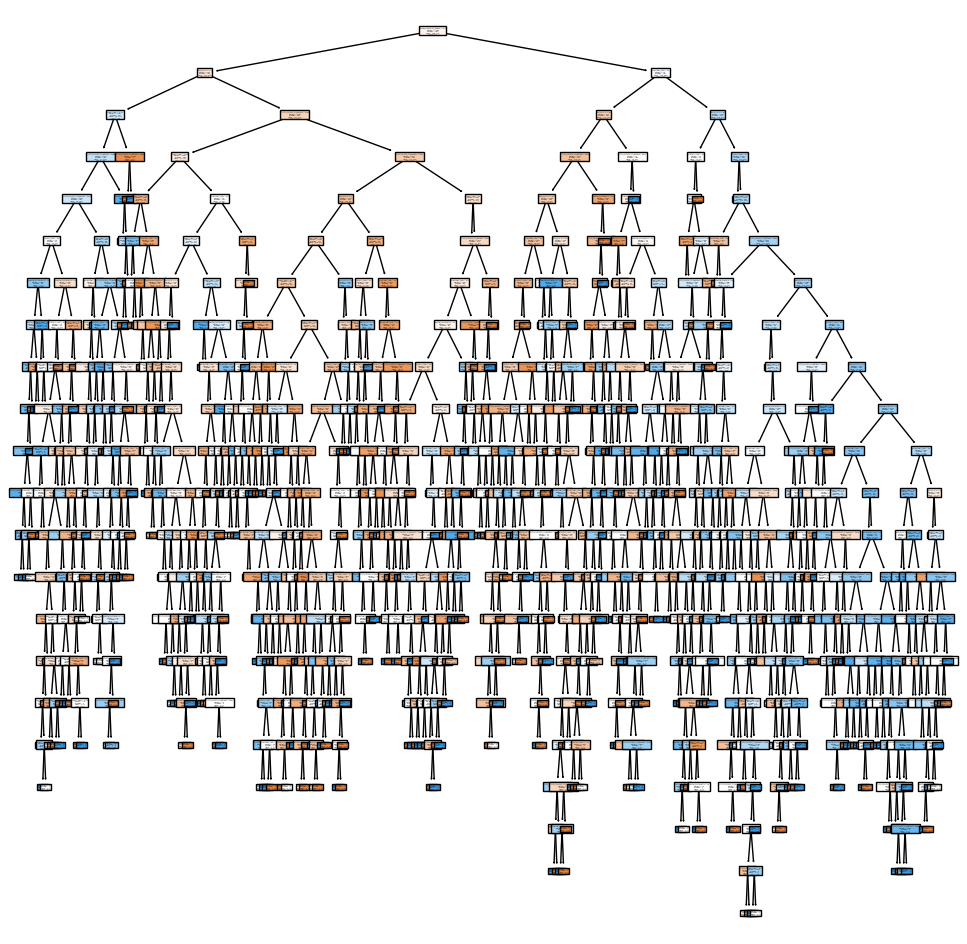

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 12))
tree.plot_tree(model, feature_names = model.feature_names_in_, class_names = model.classes_, filled = True)
plt.show()